<a href="https://colab.research.google.com/github/essanfelix/7688581-Expert-Git-GitHub/blob/main/notebook_pyspark_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Bienvenue dans Colab !</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Nouveau&#41; Essayez l'API Gemini</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


In [ ]:
!pip install pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark


In [ ]:
cd ..

/


In [ ]:
ls

bin@                        lib32@                    root/
boot/                       lib64@                    run/
content/                    libx32@                   sbin@
cuda-keyring_1.1-1_all.deb  media/                    srv/
datalab/                    mnt/                      sys/
dev/                        NGC-DL-CONTAINER-LICENSE  tmp/
etc/                        opt/                      tools/
home/                       proc/                     usr/
kaggle/                     python-apt/               var/
lib@                        python-apt.tar.xz*


In [ ]:
df = spark.read.csv('diamonds.csv', header=True)

In [ ]:
df.show(10)


+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|_c0|carat|      cut|color|clarity|depth|table|price|   x|   y|   z|
+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|  1| 0.23|    Ideal|    E|    SI2| 61.5|   55|  326|3.95|3.98|2.43|
|  2| 0.21|  Premium|    E|    SI1| 59.8|   61|  326|3.89|3.84|2.31|
|  3| 0.23|     Good|    E|    VS1| 56.9|   65|  327|4.05|4.07|2.31|
|  4| 0.29|  Premium|    I|    VS2| 62.4|   58|  334| 4.2|4.23|2.63|
|  5| 0.31|     Good|    J|    SI2| 63.3|   58|  335|4.34|4.35|2.75|
|  6| 0.24|Very Good|    J|   VVS2| 62.8|   57|  336|3.94|3.96|2.48|
|  7| 0.24|Very Good|    I|   VVS1| 62.3|   57|  336|3.95|3.98|2.47|
|  8| 0.26|Very Good|    H|    SI1| 61.9|   55|  337|4.07|4.11|2.53|
|  9| 0.22|     Fair|    E|    VS2| 65.1|   61|  337|3.87|3.78|2.49|
| 10| 0.23|Very Good|    H|    VS1| 59.4|   61|  338|   4|4.05|2.39|
+---+-----+---------+-----+-------+-----+-----+-----+----+----+----+
only showing top 10 rows



In [ ]:
# prompt: c'est quoi table carat depth color clarity x y z price des diamants

# Les colonnes que vous avez listées ('carat', 'depth', 'color', 'clarity', 'x', 'y', 'z', 'price') sont des attributs typiques que l'on retrouve dans des jeux de données sur les diamants. Voici une explication de chaque colonne :

# *   **carat** : Poids du diamant. 1 carat équivaut à 0,2 gramme. C'est un facteur majeur dans la détermination du prix d'un diamant.
# *   **depth** : La profondeur totale du diamant en pourcentage. C'est le rapport entre la profondeur et le diamètre moyen de la ceinture (la partie la plus large du diamant). C'est une mesure de la proportion du diamant.
# *   **color** : La couleur du diamant, classée sur une échelle de D (incolore) à Z (couleur visible). La plupart des diamants utilisés en joaillerie se situent entre D et N.
# *   **clarity** : La pureté du diamant, une évaluation de l'absence d'inclusions (défauts internes) et de blemishes (défauts externes). L'échelle de pureté va de FL (Flawless - sans défaut) à I3 (Included - inclusions visibles à l'œil nu).
# *   **x** : La longueur du diamant en millimètres.
# *   **y** : La largeur du diamant en millimètres.
# *   **z** : La profondeur du diamant en millimètres.
# *   **price** : Le prix du diamant en dollars américains. C'est la variable cible que l'on cherche généralement à prédire dans l'analyse de ce type de données.

# Ces colonnes sont souvent utilisées pour modéliser et prédire le prix d'un diamant en fonction de ses caractéristiques physiques et de qualité.

In [ ]:
# prompt: pourcentage des donnees manquantes

from pyspark.sql.functions import col, sum

# Calculate the number of missing values for each column
missing_values = df.select([sum(col(c).isNull().cast("integer")).alias(c) for c in df.columns])

# Show the number of missing values
missing_values.show()

# Calculate the total number of rows
total_rows = df.count()

# Calculate the percentage of missing values for each column
percentage_missing = missing_values.select([(col(c) / total_rows * 100).alias(c) for c in missing_values.columns])

# Show the percentage of missing values
percentage_missing.show()

+---+-----+---+-----+-------+-----+-----+-----+---+---+---+
|_c0|carat|cut|color|clarity|depth|table|price|  x|  y|  z|
+---+-----+---+-----+-------+-----+-----+-----+---+---+---+
|  0|    0|  0|    0|      0|    0|    0|    0|  0|  0|  0|
+---+-----+---+-----+-------+-----+-----+-----+---+---+---+

+---+-----+---+-----+-------+-----+-----+-----+---+---+---+
|_c0|carat|cut|color|clarity|depth|table|price|  x|  y|  z|
+---+-----+---+-----+-------+-----+-----+-----+---+---+---+
|0.0|  0.0|0.0|  0.0|    0.0|  0.0|  0.0|  0.0|0.0|0.0|0.0|
+---+-----+---+-----+-------+-----+-----+-----+---+---+---+



In [ ]:
#si on avait des donnees manquantes, on pourrait les remplacer par:
#methode1: imputer par moyenne(variable homogene), mediane(var dispersée) ou mode (qualitative)
#methode2: impouter par un knnimpute
#methode3: tres simple, DROPPPPPPPPPPPPPP

In [ ]:
df = df.na.drop()

In [ ]:
df.select("price","cut").show(5)


+-----+-------+
|price|    cut|
+-----+-------+
|  326|  Ideal|
|  326|Premium|
|  327|   Good|
|  334|Premium|
|  335|   Good|
+-----+-------+
only showing top 5 rows



In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("SaveCSV_HDFS") \
    .getOrCreate()

# Chargement du fichier CSV local
df = spark.read.csv("diamonds.csv", header=True, inferSchema=True)


In [ ]:
# prompt: il y a combien de cluster dans mon google colab

# SparkSession.builder.master("local") starts a Spark session in "local" mode.
# In "local" mode, Spark runs on a single machine (the one where the code is executed)
# using one or more threads. It does not connect to a cluster of machines.
# Therefore, there is only 1 "cluster" (which is the local machine itself) and 1 worker (thread).
print("There is 1 cluster and 1 worker (thread) when running in local mode.")

There is 1 cluster and 1 worker (thread) when running in local mode.


In [ ]:
df_reparti = df.repartition(10)  #diviser votre  base de donnees avec le nommbre de cluster disponible (infos disponibles en entreprise)


In [ ]:
df_reparti.write \
    .mode("overwrite") \
    .option("header", True) \
    .csv("diamonds_partitionnees")


In [ ]:
cd diamonds_partitionnees/

[Errno 2] No such file or directory: 'diamonds_partitionnees/'
/


In [ ]:
ls

bin@                        lib32@                    root/
boot/                       lib64@                    run/
content/                    libx32@                   sbin@
cuda-keyring_1.1-1_all.deb  media/                    srv/
datalab/                    mnt/                      sys/
dev/                        NGC-DL-CONTAINER-LICENSE  tmp/
etc/                        opt/                      tools/
home/                       proc/                     usr/
kaggle/                     python-apt/               var/
lib@                        python-apt.tar.xz*


In [ ]:
ls

bin@                        lib32@                    root/
boot/                       lib64@                    run/
content/                    libx32@                   sbin@
cuda-keyring_1.1-1_all.deb  media/                    srv/
datalab/                    mnt/                      sys/
dev/                        NGC-DL-CONTAINER-LICENSE  tmp/
etc/                        opt/                      tools/
home/                       proc/                     usr/
kaggle/                     python-apt/               var/
lib@                        python-apt.tar.xz*


In [ ]:
import pandas as pd
pd.read_csv(r"/content/diamonds.csv").price.mean()

np.float64(3932.799721913237)

In [ ]:
from pyspark.sql.functions import avg

# Calcul de la moyenne des prix
df_reparti.select(avg("price").alias("moyenne_prix")).show()


+-----------------+
|     moyenne_prix|
+-----------------+
|3932.799721913237|
+-----------------+



In [ ]:
def moyenne_par_partition(iterator):
    total = 0
    count = 0
    for row in iterator:
        if row["price"] is not None:
            total += row["price"]
            count += 1
    yield (total, count)

# Appliquer sur le RDD
rdd = df_reparti.rdd.mapPartitions(moyenne_par_partition)

# Afficher les totaux et compteurs par partition
partitions_stats = rdd.collect()
print("Stats par partition :", partitions_stats)

# Calculer les moyennes par partition
moyennes = [round(tot / cnt, 2) for tot, cnt in partitions_stats]
print("Moyenne par partition :", moyennes)


Stats par partition : [(20926984, 5394), (20973632, 5394), (21375794, 5394), (21409440, 5394), (20828433, 5394), (21203975, 5394), (20994199, 5394), (21480441, 5394), (21524455, 5394), (21417864, 5394)]
Moyenne par partition : [3879.68, 3888.33, 3962.88, 3969.12, 3861.41, 3931.03, 3892.14, 3982.28, 3990.44, 3970.68]


In [ ]:
df_loaded = spark.read.csv("diamonds_partitionnees", header=True, inferSchema=True)


In [ ]:
df_loaded.rdd.getNumPartitions()


1

Si vous connaissez déjà Colab, regardez cette vidéo pour découvrir les tables interactives, l'affichage de l'historique du code exécuté et la palette de commandes.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  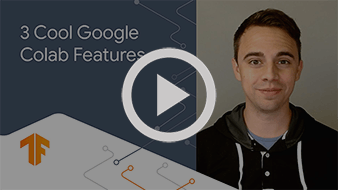
  </a>
</center>

In [ ]:
sample_df = df_loaded.select("price").sample(fraction=0.1, seed=42)


In [ ]:
prices_pd = sample_df.toPandas()["price"]


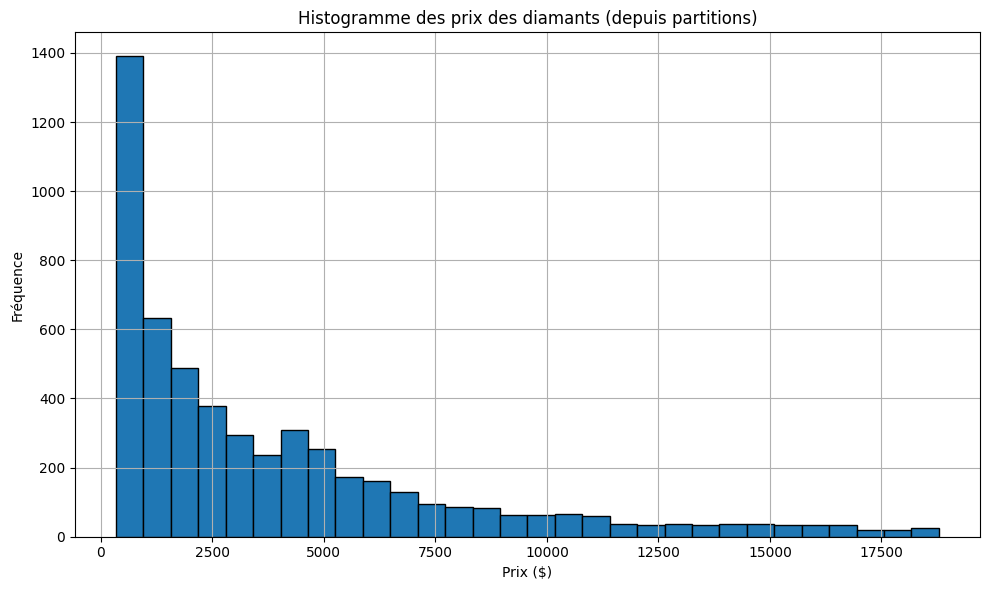

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(prices_pd, bins=30, edgecolor='black')
plt.title("Histogramme des prix des diamants (depuis partitions)")
plt.xlabel("Prix ($)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_loaded = spark.read.csv("diamonds_partitionnees", header=True, inferSchema=True)
df_loaded = df_loaded.repartition(10)  # Redéfinir le découpage en 10 partitions


In [ ]:
df_loaded.rdd.getNumPartitions()  # ➜ Devrait afficher 10


10

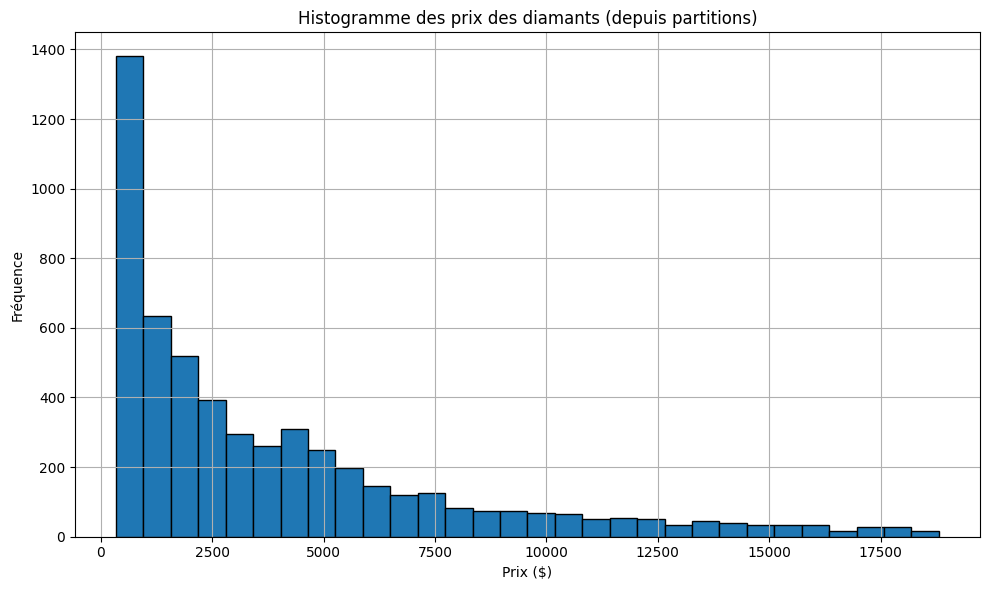

In [ ]:
# 1. Charger les partitions
df_loaded = spark.read.csv("diamonds_partitionnees", header=True, inferSchema=True)

# 2. Repartitionner si nécessaire
df_loaded = df_loaded.repartition(10)

# 3. Convertir pour matplotlib
prices_pd = df_loaded.select("price").sample(0.1).toPandas()["price"]

# 4. Afficher l’histogramme
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(prices_pd, bins=30, edgecolor='black')
plt.title("Histogramme des prix des diamants (depuis partitions)")
plt.xlabel("Prix ($)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from pyspark.sql.functions import avg

df_loaded.groupBy("cut") \
    .agg(avg("price").alias("moyenne_prix")) \
    .orderBy("moyenne_prix", ascending=False) \
    .show()


+---------+------------------+
|      cut|      moyenne_prix|
+---------+------------------+
|  Premium|4584.2577042999055|
|     Fair| 4358.757763975155|
|Very Good|3981.7598907465654|
|     Good| 3928.864451691806|
|    Ideal| 3457.541970210199|
+---------+------------------+



In [ ]:
df_loaded.rdd.getNumPartitions()  # ➜ Devrait afficher 10


10

In [ ]:
# On suppose que df_loaded contient les données
df_loaded = spark.read.csv("diamonds_partitionnees", header=True, inferSchema=True)

# Filtrer les diamants dont le prix est supérieur à 12 000
df_filtered = df_loaded.filter(df_loaded.price > 12000)

# Afficher les résultats
df_filtered.show(truncate=False)


+-----+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|_c0  |carat|cut      |color|clarity|depth|table|price|x   |y   |z   |
+-----+-----+---------+-----+-------+-----+-----+-----+----+----+----+
|24467|1.32 |Very Good|F    |VVS2   |61.6 |61.0 |12736|6.97|7.02|4.31|
|27221|2.36 |Ideal    |H    |SI2    |62.2 |55.0 |17569|8.51|8.56|5.3 |
|25981|1.54 |Premium  |E    |VS2    |60.8 |58.0 |15185|7.39|7.44|4.51|
|24011|1.5  |Premium  |D    |SI1    |62.4 |58.0 |12179|7.31|7.27|4.55|
|25607|2.07 |Premium  |H    |SI1    |61.2 |60.0 |14476|8.2 |8.12|4.99|
|24017|1.62 |Ideal    |I    |VVS1   |61.5 |58.0 |12186|7.54|7.56|4.64|
|24786|1.51 |Ideal    |E    |VS2    |61.1 |57.0 |13157|7.43|7.41|4.53|
|25443|1.5  |Ideal    |F    |VS2    |62.4 |55.0 |14199|7.31|7.25|4.54|
|23981|1.52 |Ideal    |H    |VVS2   |61.8 |58.0 |12123|7.41|7.35|4.56|
|27097|2.01 |Premium  |D    |SI2    |61.8 |59.0 |17235|8.15|8.07|5.01|
|24204|2.01 |Very Good|J    |SI1    |62.4 |59.0 |12392|8.02|8.08|5.02|
|27534

In [ ]:
from pyspark.sql.functions import col

# Charger les données
df_loaded = spark.read.csv("diamonds_partitionnees", header=True, inferSchema=True)

# Filtrer les prix < 15000 et cut == "Fair"
df_fair = df_loaded.filter(
    (col("price") < 15000) & (col("cut") == "Fair")
)

# Afficher les résultats
df_fair.show(truncate=False)


+-----+-----+----+-----+-------+-----+-----+-----+----+----+----+
|_c0  |carat|cut |color|clarity|depth|table|price|x   |y   |z   |
+-----+-----+----+-----+-------+-----+-----+-----+----+----+----+
|1943 |0.9  |Fair|E    |SI2    |65.8 |58.0 |3084 |6.02|5.98|3.95|
|705  |0.91 |Fair|J    |VS2    |65.4 |60.0 |2854 |6.04|6.0 |3.94|
|16502|1.51 |Fair|D    |SI2    |66.2 |54.0 |6596 |7.19|7.08|4.72|
|10172|1.0  |Fair|F    |VS2    |66.7 |57.0 |4732 |6.11|6.04|4.05|
|51629|0.72 |Fair|G    |VS1    |66.4 |57.0 |2396 |5.6 |5.51|3.69|
|51467|0.9  |Fair|G    |SI2    |65.4 |57.0 |2376 |6.01|5.97|3.98|
|38154|0.25 |Fair|F    |SI2    |54.4 |64.0 |1013 |4.3 |4.23|2.32|
|52993|0.7  |Fair|G    |VVS2   |64.5 |61.0 |2595 |5.43|5.52|3.53|
|52991|0.77 |Fair|H    |VS1    |64.6 |56.4 |2594 |5.78|5.84|3.75|
|49997|0.58 |Fair|E    |VS1    |57.9 |56.0 |2192 |5.52|5.49|3.19|
|40674|0.5  |Fair|H    |VS1    |66.5 |60.0 |1155 |4.93|4.85|3.25|
|45037|0.96 |Fair|H    |I1     |61.5 |63.0 |1637 |6.22|6.06|3.78|
|19561|1.5

In [ ]:
df_fair.orderBy(col("price").desc()).show(truncate=False)


+-----+-----+----+-----+-------+-----+-----+-----+----+----+----+
|_c0  |carat|cut |color|clarity|depth|table|price|x   |y   |z   |
+-----+-----+----+-----+-------+-----+-----+-----+----+----+----+
|25878|2.43 |Fair|G    |SI2    |64.5 |57.0 |14975|8.41|8.36|5.41|
|25866|2.01 |Fair|E    |SI2    |62.1 |66.0 |14948|7.99|7.92|4.94|
|25833|1.7  |Fair|G    |VS2    |64.5 |58.0 |14860|7.51|7.43|4.82|
|25803|2.01 |Fair|G    |SI2    |63.8 |59.0 |14799|7.77|7.87|4.99|
|25781|2.06 |Fair|J    |VS1    |64.6 |58.0 |14750|7.91|8.04|5.15|
|25749|2.03 |Fair|G    |SI2    |64.9 |59.0 |14687|7.85|7.99|5.14|
|25730|2.5  |Fair|J    |SI2    |66.9 |58.0 |14652|8.36|8.22|5.55|
|25726|2.03 |Fair|H    |SI1    |65.4 |58.0 |14646|7.91|7.88|5.16|
|25591|2.0  |Fair|H    |SI1    |65.1 |56.0 |14430|7.86|7.77|5.09|
|25566|2.01 |Fair|J    |VS1    |66.6 |54.0 |14402|7.76|7.92|5.22|
|25452|2.0  |Fair|G    |SI2    |66.5 |56.0 |14208|7.75|7.7 |5.14|
|25447|2.0  |Fair|H    |VS1    |66.0 |56.0 |14199|7.79|7.72|5.12|
|25441|2.5

In [ ]:
df_fair.select("cut", "carat", "color", "clarity", "price").show(truncate=False)


+----+-----+-----+-------+-----+
|cut |carat|color|clarity|price|
+----+-----+-----+-------+-----+
|Fair|0.9  |E    |SI2    |3084 |
|Fair|0.91 |J    |VS2    |2854 |
|Fair|1.51 |D    |SI2    |6596 |
|Fair|1.0  |F    |VS2    |4732 |
|Fair|0.72 |G    |VS1    |2396 |
|Fair|0.9  |G    |SI2    |2376 |
|Fair|0.25 |F    |SI2    |1013 |
|Fair|0.7  |G    |VVS2   |2595 |
|Fair|0.77 |H    |VS1    |2594 |
|Fair|0.58 |E    |VS1    |2192 |
|Fair|0.5  |H    |VS1    |1155 |
|Fair|0.96 |H    |I1     |1637 |
|Fair|1.5  |E    |SI2    |8190 |
|Fair|0.52 |F    |IF     |2144 |
|Fair|0.33 |F    |VVS2   |693  |
|Fair|1.54 |F    |SI2    |7848 |
|Fair|0.71 |G    |SI2    |2055 |
|Fair|2.27 |J    |I1     |5733 |
|Fair|0.57 |E    |VVS1   |2805 |
|Fair|0.7  |G    |VS2    |2338 |
+----+-----+-----+-------+-----+
only showing top 20 rows



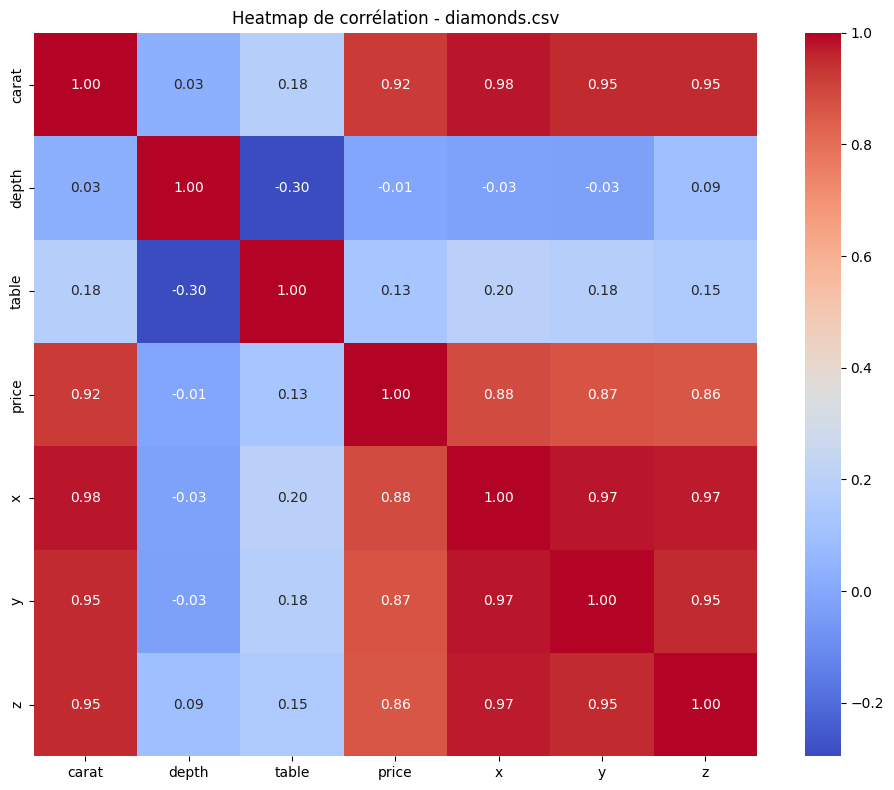

In [ ]:
from pyspark.sql.functions import col

# Colonnes numériques à extraire
cols = ["carat", "depth", "table", "price", "x", "y", "z"]

# Sélectionner et convertir en Pandas
df_corr = df_loaded.select([col(c).cast("float") for c in cols]).dropna().toPandas()

# Afficher la heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Heatmap de corrélation - diamonds.csv")
plt.tight_layout()
plt.show()


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator


In [ ]:
features = ["carat", "depth", "table", "x", "y", "z"]
df = df.select("price", *features).dropna()


In [ ]:
assembler = VectorAssembler(inputCols=features, outputCol="features")
df_vector = assembler.transform(df)


In [ ]:
lr = LinearRegression(featuresCol="features", labelCol="price")
model = lr.fit(df_vector)


In [ ]:
predictions = model.transform(df_vector)

evaluator = RegressionEvaluator(
    labelCol="price", predictionCol="prediction", metricName="rmse")

rmse = evaluator.evaluate(predictions)
print("RMSE (Root Mean Squared Error) :", rmse)


RMSE (Root Mean Squared Error) : 1496.8572842935766


In [ ]:
predictions.select("features", "price", "prediction").show(10, truncate=False)


+-------------------------------+-----+-------------------+
|features                       |price|prediction         |
+-------------------------------+-----+-------------------+
|[0.23,61.5,55.0,3.95,3.98,2.43]|326  |346.9097180430981  |
|[0.21,59.8,61.0,3.89,3.84,2.31]|326  |-71.4687647858118  |
|[0.23,56.9,65.0,4.05,4.07,2.31]|327  |126.36867400343544 |
|[0.29,62.4,58.0,4.2,4.23,2.63] |334  |193.9016388965938  |
|[0.31,63.3,58.0,4.34,4.35,2.75]|335  |53.54959145628163  |
|[0.24,62.8,57.0,3.94,3.96,2.48]|336  |-1.307132265807013 |
|[0.24,62.3,57.0,3.95,3.98,2.47]|336  |88.02337057303885  |
|[0.26,61.9,55.0,4.07,4.11,2.53]|337  |441.14180650160415 |
|[0.22,65.1,61.0,3.87,3.78,2.49]|337  |-1011.4951053409932|
|[0.23,59.4,61.0,4.0,4.05,2.39] |338  |96.05332741263919  |
+-------------------------------+-----+-------------------+
only showing top 10 rows



In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("DiamondsData") \
    .getOrCreate()

In [ ]:
df = spark.read.csv("diamonds.csv", header=True, inferSchema=True)

In [ ]:
df_reparti = df.repartition(10)

In [ ]:
Cela partitionne le DataFrame df en 10 partitions et stocke le résultat dans un nouveau DataFrame nommé df_reparti. Vous pouvez modifier le nombre 10 pour modifier le nombre de partitions souhaité.

Maintenant, votre DataFrame PySpark est chargé et partitionné en 10. Vous pouvez effectuer d'autres opérations sur df_reparti comme vous le souhaitez, telles que l'exécution de requêtes, l'agrégation de données et l'écriture des résultats dans un fichier.

J'espère que cela vous aidera ! N'hésitez pas à me faire savoir si vous avez d'autres questions.

SyntaxError: unterminated string literal (detected at line 5) (<ipython-input-107-e0784f021ba0>, line 5)

In [ ]:
def moyenne_par_partition(iterator):
    total = 0
    count = 0
    for row in iterator:
        if row["price"] is not None:
            total += row["price"]
            count += 1
    yield (total, count)

# Appliquer sur le RDD
rdd = df_reparti.rdd.mapPartitions(moyenne_par_partition)

# Afficher les totaux et compteurs par partition
partitions_stats = rdd.collect()
print("Stats par partition :", partitions_stats)

# Calculer les moyennes par partition
moyennes = [round(tot / cnt, 2) for tot, cnt in partitions_stats]
print("Moyenne par partition :", moyennes)

In [ ]:
Raisonnement

moyenne_par_partition : Cette fonction est appliquée à chaque partition. Elle itère sur les lignes de la partition, additionne les prix et compte les lignes. Elle renvoie ensuite le total et le nombre de lignes pour cette partition.
df_reparti.rdd.mapPartitions : Cela applique la fonction moyenne_par_partition à chaque partition du RDD (Resilient Distributed Dataset) sous-jacent du DataFrame.
rdd.collect : Cela collecte les résultats de toutes les partitions sur le nœud pilote.
Calcul de la moyenne : La liste des moyennes est calculée en divisant le total par le nombre de lignes pour chaque partition.
Important :

Assurez-vous que df_reparti est le DataFrame partitionné que vous avez créé précédemment.
Les résultats seront imprimés sur la console.
J'espère que cela répond à votre question ! N'hésitez pas à me faire savoir si vous avez besoin de plus de précisions.

In [ ]:
Oui, le code que j'ai fourni utilise implicitement le concept de MapReduce, même si les termes « map » et « reduce » ne sont pas explicitement utilisés dans le code PySpark.

Voici comment le concept MapReduce est appliqué :

Étape Map : La fonction moyenne_par_partition agit comme l'étape de map. Elle est appliquée à chaque partition du DataFrame df_reparti. Elle traite chaque ligne de la partition (c'est-à-dire « mappe » chaque ligne) pour calculer le total des prix et le nombre de lignes dans cette partition.

Étape Shuffle (Répartition) : Cette étape est implicite dans PySpark. Après l'étape de map, PySpark répartit les résultats intermédiaires (total et nombre) de chaque partition.

Étape Reduce : La partie rdd.collect suivie du calcul de la moyenne agit comme l'étape de reduce. rdd.collect rassemble les résultats intermédiaires de toutes les partitions sur le nœud pilote. Ensuite, le code calcule la moyenne pour chaque partition en divisant le total par le nombre, ce qui est essentiellement une opération de « réduction ».

En résumé :

mapPartitions : Applique la fonction moyenne_par_partition (étape Map) à chaque partition du DataFrame.
Implicitement, PySpark effectue le shuffle pour regrouper les résultats intermédiaires.
rdd.collect et le calcul de la moyenne : Rassemble les résultats et calcule la moyenne finale pour chaque partition (étape Reduce).
Même si le code PySpark utilise des abstractions de plus haut niveau, il repose toujours sur les principes fondamentaux de MapReduce pour effectuer des calculs distribués.

In [ ]:
Oui, en général, utiliser PySpark avec une approche de type MapReduce pour calculer la moyenne des prix par partition est plus rapide que d'utiliser Pandas pour des datasets volumineux. Voici pourquoi :

Traitement distribué : PySpark est conçu pour le traitement distribué des données. Il divise les données en plusieurs partitions et les traite en parallèle sur plusieurs nœuds d'un cluster. Cela permet d'accélérer considérablement les calculs, en particulier pour les datasets volumineux qui ne peuvent pas être stockés en mémoire sur un seul ordinateur. Pandas, en revanche, traite les données en mémoire sur une seule machine, ce qui peut limiter ses performances pour les grands datasets.

MapReduce : L'approche MapReduce utilisée dans le code PySpark permet de paralléliser le calcul de la moyenne. L'étape Map calcule le total et le nombre de lignes dans chaque partition de manière indépendante, puis l'étape Reduce agrège ces résultats intermédiaires pour obtenir la moyenne finale. Cette parallélisation permet d'accélérer le traitement, car chaque partition peut être traitée simultanément par un nœud différent du cluster. Pandas, en revanche, effectue les calculs de manière séquentielle, ce qui peut prendre plus de temps pour les grands datasets.

Évitement des goulots d'étranglement : PySpark évite les goulots d'étranglement liés au traitement en mémoire sur une seule machine. En distribuant les données et les calculs sur plusieurs nœuds, il réduit la charge sur chaque machine individuelle et permet un traitement plus efficace. Pandas, en revanche, peut être limité par la capacité de mémoire de la machine sur laquelle il s'exécute, ce qui peut ralentir le traitement pour les datasets volumineux.

En résumé :

PySpark exploite le traitement distribué et le parallélisme de MapReduce pour accélérer les calculs sur les grands datasets.
Pandas est limité par le traitement en mémoire sur une seule machine, ce qui peut ralentir les performances pour les grands datasets.

In [ ]:
cd ..


In [ ]:
import pandas as pd
import time


# Charger les données avec Pandas
diamonds_pd = pd.read_csv('diamonds.csv')
start_time = time.time()

# Calculer la moyenne des prix
moyenne_pandas = diamonds_pd['price'].mean()

end_time = time.time()
pandas_time = end_time - start_time

print(f"Moyenne des prix (Pandas): {moyenne_pandas}")
print(f"Temps de calcul (Pandas): {pandas_time} secondes")

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
import time


# Démarrer une session Spark
spark = SparkSession.builder.appName("DiamondsData").getOrCreate()

# Charger les données avec Spark
diamonds_spark = spark.read.csv("diamonds.csv", header=True, inferSchema=True)
start_time = time.time()

# Calculer la moyenne des prix
moyenne_spark = diamonds_spark.select(avg("price")).collect()[0][0]

end_time = time.time()
spark_time = end_time - start_time

print(f"Moyenne des prix (Spark): {moyenne_spark}")
print(f"Temps de calcul (Spark): {spark_time} secondes")

# Arrêter la session Spark
spark.stop()

In [ ]:
Taille du dataset : Le dataset "diamonds.csv" n'est peut-être pas assez volumineux pour que Spark puisse réellement exploiter son avantage en termes de traitement distribué. Pour de très petits datasets, le surcoût de la configuration d'un cluster Spark peut être plus important que le gain de performance obtenu par le parallélisme.

Opération simple : Le calcul d'une moyenne est une opération relativement simple. Pandas est optimisé pour ce type d'opérations sur des datasets qui tiennent en mémoire. Spark est plus performant pour des opérations plus complexes et des transformations de données plus importantes.

Configuration de Spark : La performance de Spark dépend fortement de la configuration du cluster (nombre d'exécuteurs, mémoire allouée, etc.). Si la configuration n'est pas optimale, Spark peut être plus lent que Pandas, même pour des datasets plus volumineux.

Coût de la sérialisation/désérialisation : Spark utilise la sérialisation pour transférer des données entre les nœuds du cluster. Ce processus peut ajouter un surcoût, surtout pour des datasets avec un grand nombre de colonnes.

En résumé :

Pour des datasets de petite à moyenne taille et des opérations simples, Pandas peut être plus rapide que Spark.
Pour des datasets volumineux et des opérations complexes, Spark est généralement plus performant.
Recommandations :

Si vous travaillez avec un dataset volumineux qui ne tient pas en mémoire sur une seule machine, ou si vous devez effectuer des opérations complexes, privilégiez Spark.
Si vous travaillez avec un petit dataset et que vous n'avez besoin que de calculer des statistiques simples, Pandas peut être un choix plus judicieux.
Expérimentez avec différents paramètres de configuration de Spark pour optimiser les performances.
J'espère que ces explications vous aident à mieux comprendre les résultats que vous avez obtenus ! N'hésitez pas à me faire savoir si vous avez d'autres questions.

In [ ]:
Avantages de PySpark :

Flexibilité : PySpark offre plus de flexibilité que Hive ou Pig, car il permet d'utiliser l'ensemble des fonctionnalités de Python pour manipuler les données.
Performance : PySpark peut être plus performant que Hive ou Pig, en particulier pour les datasets volumineux, grâce à son architecture optimisée pour le traitement distribué.
Intégration : PySpark s'intègre parfaitement avec d'autres outils de l'écosystème Spark, comme MLlib pour le machine learning et Spark Streaming pour le traitement de flux de données.
J'espère que ces exemples vous donnent une idée des capacités de PySpark pour effectuer des calculs de type Hive ou Pig. N'hésitez pas à me faire savoir si vous avez d'autres questions.

In [ ]:
avec ce fichier diamonds csv faits moi les parties suivantes avec hadoop, hive, pig, pyspark pour 1. ouverture du fichier diamonds csv

In [ ]:
1. Hadoop (HDFS)

Hadoop est un framework pour le stockage et le traitement distribué de données volumineuses. HDFS (Hadoop Distributed File System) est le système de fichiers de Hadoop. Pour ouvrir le fichier diamonds.csv avec Hadoop, vous devez d'abord le copier dans HDFS.

Voici les commandes pour cela :

In [ ]:
# Copier le fichier dans HDFS
hadoop fs -put diamonds.csv /user/hadoop/diamonds.csv

# Afficher le contenu du fichier
hadoop fs -cat /user/hadoop/diamonds.csv

In [ ]:
hadoop fs -put : Cette commande copie le fichier local diamonds.csv dans HDFS à l'emplacement /user/hadoop/diamonds.csv.
hadoop fs -cat : Cette commande affiche le contenu du fichier stocké dans HDFS.

In [ ]:
2. Hive

Hive est un entrepôt de données construit sur Hadoop pour fournir une structure et un schéma aux données stockées dans HDFS. Il permet de requêter les données avec un langage de type SQL appelé HiveQL.

Voici les commandes pour ouvrir le fichier diamonds.csv avec Hive :

In [ ]:
-- Créer une table externe pour le fichier CSV
CREATE EXTERNAL TABLE diamonds (
  carat FLOAT,
  cut STRING,
  color STRING,
  clarity STRING,
  depth FLOAT,
  table FLOAT,
  price INT,
  x FLOAT,
  y FLOAT,
  z FLOAT
)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
STORED AS TEXTFILE
LOCATION '/user/hadoop/diamonds.csv';

-- Afficher les données de la table
SELECT * FROM diamonds LIMIT 10;

In [ ]:
CREATE EXTERNAL TABLE : Cette commande crée une table externe nommée diamonds qui pointe vers le fichier CSV dans HDFS.
ROW FORMAT DELIMITED, FIELDS TERMINATED BY, STORED AS TEXTFILE : Ces clauses spécifient le format du fichier CSV.
LOCATION : Cette clause indique l'emplacement du fichier CSV dans HDFS.
SELECT * FROM diamonds LIMIT 10 : Cette commande affiche les 10 premières lignes de la table.

In [ ]:
3. Pig

Pig est un langage de haut niveau pour le traitement de données volumineuses sur Hadoop. Il permet d'exprimer des transformations de données complexes avec une syntaxe simple.

Voici le code pour ouvrir le fichier diamonds.csv avec Pig :

In [ ]:
pig
-- Charger le fichier CSV
diamonds = LOAD 'hdfs://localhost:9000/user/hadoop/diamonds.csv' USING PigStorage(',') AS (carat:float, cut:chararray, color:chararray, clarity:chararray, depth:float, table:float, price:int, x:float, y:float, z:float);

-- Afficher les données
DUMP diamonds;

In [ ]:
LOAD : Cette commande charge le fichier CSV dans une relation nommée diamonds.
USING PigStorage(',') : Cette clause spécifie le format du fichier CSV.
AS (carat:float, ...) : Cette clause définit le schéma de la relation.
DUMP diamonds : Cette commande affiche les données de la relation.

In [ ]:
4. PySpark

PySpark est une API Python pour Spark, un framework de calcul distribué. Il permet de traiter des données volumineuses avec Python.

Voici le code pour ouvrir le fichier diamonds.csv avec PySpark :

In [ ]:
from pyspark.sql import SparkSession

# Créer une session Spark
spark = SparkSession.builder.appName("DiamondsData").getOrCreate()

# Charger le fichier CSV
df = spark.read.csv("diamonds.csv", header=True, inferSchema=True)

# Afficher les données
df.show(10)

In [ ]:
SparkSession.builder : Cette ligne crée une session Spark.
spark.read.csv : Cette commande charge le fichier CSV dans un DataFrame nommé df.
header=True, inferSchema=True : Ces options indiquent à Spark d'utiliser la première ligne comme en-têtes de colonnes et de déduire automatiquement les types de données.
df.show(10) : Cette commande affiche les 10 premières lignes du DataFrame.
J'espère que cela vous aide ! N'hésitez pas à me faire savoir si vous avez d'autres questions.